# Máquinas de Vetor Suporte

Até o momento, verificamos como traduzir problema de classificação como um caso específico de problemas de regressão. Para tal, a saída $y=f(x)$ do sistema de regressão é condicionada por uma função degrau $g(y)$ tal que:
$$\begin{array}{ll}
g(y)=1 &\mbox{se } y > \alpha\\
 g(y) = -1 &  \mbox{se } y \leq \alpha
 \end{array}$$
 
A função degrau traz o problema de não ter uma derivada, de forma que um sistema envolvendo-a é difícil de otimizar. Trocando a função degrau por uma função contínua, mas semelhante, como $\tanh(y)$, o sistema de regressão pode ser treinado como um sistema de aproximação.

Nesta interação, investigaremos um outro paradigma para treinar máquinas de classificação, que é usado para construir as máquinas de vetor suporte (*Support Vector Machines - SVMs*).

## Objetivos

Ao fim desta interação, o aluno deverá:
1. Entender o conceito de *vetor-suporte*
2. Entender a diferença entre os paradigmas de treinamento por minimização de EQM e por vetores-suporte
3. Aplicar SVMs a problemas de classificação

In [3]:
# Inicializacao
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

## Separação linear

Dizemos que dois conjuntos de pontos são linearmente separáveis se podemos traçar uma reta (ou: um hiperplano) que os separa completamente no espaço $\mathbb{R}^N$. Assim, poderíamos analisar o seguinte caso arbitrário:

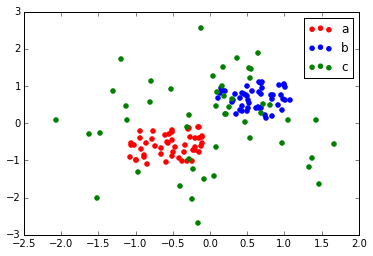

In [4]:
a = np.random.rand(2,50) - 1.1
b = np.random.rand(2,50) + 0.1
c = np.random.randn(2,50) 
plt.figure();
plt.scatter(a[0,:], a[1,:], color='red');
plt.scatter(b[0,:], b[1,:], color='blue');
plt.scatter(c[0,:], c[1,:], color='green');
plt.legend(['a', 'b', 'c']);

Nesta configuração, os conjuntos **a** e **b** são linearmente separáveis entre si, mas nenhum deles é linearmente separável de **c**.

## Risco de uma margem de decisão

Considerando os conjuntos **a** e **b** acima, podemos encontrar diversas fronteiras de decisão interessantes. Veja, por exemplo, três possíveis fronteiras de decisão (preta, verde e roxa):

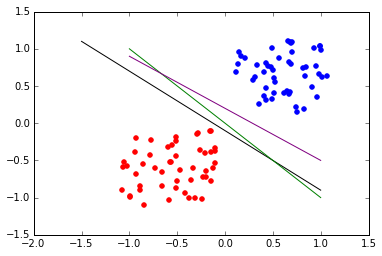

In [5]:
plt.figure();
plt.scatter(a[0,:], a[1,:], color='red');
plt.scatter(b[0,:], b[1,:], color='blue');
plt.plot([-1.5, 1], [1.1, -0.9], color='black', lw=1);
plt.plot([-1, 1], [1, -1], color='green', lw=1);
plt.plot([-1, 1], [0.9, -0.5], color='purple', lw=1);

As três fronteiras levarão a um erro de classificação zero. Porém, as fronteiras roxa e preta estão muito mais próximas de um conjunto que de outro. Se os conjuntos linearmente separáveis **a** e **b** forem conjuntos de treinamento, então fronteiras muito próximas de um dos conjuntos provavelmente acarretarão em erros em com conjunto de testes.

Por esse motivo, a fronteira verde parece ser mais "segura", ou ainda, de *menor risco*.

A fronteira de decisão de menor risco pode ser encontrada à partir, somente, dos elementos de um conjunto que ficam mais próximo do outro conjunto.

## Kernels e mapeamento para um espaço de dimensão elevada

SVMs, em grande parte, baseiam-se na idéia de que, para qualquer conjunto de dados, existe algum mapeamento não-linear para uma dimensão mais elevada em que os dados são linearmente separáveis. Esse mapeamento é realizado por meio da aplicação de uma função chamada *kernel*, de forma semelhante a uma rede neural com poucas entradas e muitas saídas.

A SVM se baseia numa função de mapeamento e então, subsequentemente, na aplicação de uma função de classificação linear:
$$z = g(f(x)).$$

É evidente que o mapeamento para uma dimensão muito elevada, no caso de uma rede neural, demandaria uma quantidade muito grande de memória. A SVM evita esse processo calculando diretamente o valor de $g(f(x))$ sem passar pelos estágios intermediários.

## O procedimento da SVM

As SVMs baseiam-se no seguinte procedimento:
1. Mapear os dados para um espaço de dimensão elevada, no qual eles são linearmente separáveis
2. Encontrar uma reta de separação que minimiza o risco, maximizando a distância entre a reta e os elementos de cada conjunto
3. Executar a classificação

O procedimento de treino (supervisionado e discriminativo) da SVM é um procedimento convexo, então seu ótimo global é único.

## Configurando uma SVM

Em implementações de SVMs, é comum encontrarmos os seguintes parâmetros:

* **C**: é um coeficiente relacionado à regularização do resultado. Um valor muito alto permite criar SVMs com fronteiras de decisão mais flexíveis, mas pode levar ao *overfitting*. Um valor muito baixo pode levar ao *underfitting*. Outra intepretação: **C** é o custo de aceitar uma classificação errada ao tentar encontrar uma margem de decisão mais regular. Assim, quanto mais baixo é **C**, menos a idéia de separação linear é aplicada, beneficiando a suavidade da fronteira de decisão. $\boldsymbol C \rightarrow \infty$ leva a uma SVM que funciona estritamente como discutido acima.

* $\boldsymbol \epsilon$: O aumento deste parâmetro implica no uso de mais elementos para serem selecionados como vetores-suporte. Deve ser aumentado em conjutos de dados mais ruidosos, mas seu aumento excessivo pode prejudicar o desempenho da SVM.

Um procedimento comum para encontrar os valores ótimos desses parâmetros é executar uma busca em grade (logarítmica, variando de $10^{-7}$ a $10^4$), tentando minimizar o erro de classificação em relação a uma parte do conjunto de treinamento.

In [19]:
# Abrindo conjunto de dados
import csv
with open("biometria.csv", 'rb') as f:
    dados = list(csv.reader(f))
    
rotulos_volei = [d[0] for d in dados[1:-1] if d[0] is 'V']
rotulos_futebol = [d[0] for d in dados[1:-1] if d[0] is 'F']
altura_volei = [[float(d[1])] for d in dados[1:-1] if d[0] is 'V']
altura_futebol = [[float(d[1])] for d in dados[1:-1] if d[0] is 'F']
peso_volei = [[float(d[2])] for d in dados[1:-1] if d[0] is 'V']
peso_futebol = [[float(d[2])] for d in dados[1:-1] if d[0] is 'F']

In [26]:
from sklearn.svm import SVC
classificador = SVC(C=10.0)
classificador.fit(altura_volei + altura_futebol, rotulos_volei + rotulos_futebol);
score = classificador.score(altura_volei + altura_futebol, rotulos_volei + rotulos_futebol)
print "Acertos:", int(score * len(altura_volei + altura_futebol))

Acertos: 41


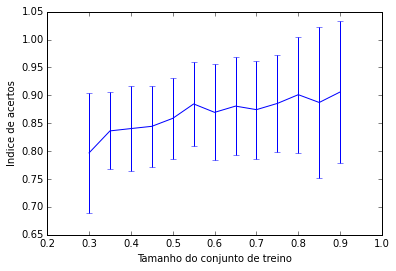

In [36]:
from sklearn.cross_validation import train_test_split

# Parametros para executar busca exaustiva
train_size_min = 0.3
train_size_max = 0.95
train_size_step = 0.05

# Numero de iteracoes para cada tamanho de conjunto de treino
n_iter = 100

# Listas que armazenarao os resultados
steps = []
medias = []
variancias = []

train_size_atual = train_size_min
while train_size_atual <= train_size_max: # para cada tamanho do conjunto de treino
    acertos = []
    for k in xrange(n_iter): # para cada iteracao do processo Monte Carlo
        dados_treino, dados_teste, rotulos_treino, rotulos_teste =\
            train_test_split(altura_volei + altura_futebol, rotulos_volei + rotulos_futebol, train_size=train_size_atual)
            
        classificador = SVC(C=10.0); # n_neighbors = K
        classificador.fit(dados_treino, rotulos_treino);
        score = classificador.score(dados_teste, rotulos_teste);
        acertos.append(score)
    
    steps.append(train_size_atual)
    medias.append(np.mean(np.array(acertos)))
    variancias.append(np.std(np.array(acertos)))
    
    train_size_atual += train_size_step


plt.figure();
plt.errorbar(steps, medias, yerr=variancias);
plt.ylabel('Indice de acertos');
plt.xlabel('Tamanho do conjunto de treino');

# Exercícios

1. Desenhe um fluxograma que representa o processo de aprendizado supervisionado e teste do sistema, mostrando como os dados de entrada são divididos e como são utilizados no processo de treinamento e teste.
2. Compare esse fluxograma com o procedimento relacionado ao classificador por KNN.
3. Considere um conjunto de dados à sua escolha, em que haja duas classes. Execute o procedimento de classificação com SVM nesse conjunto de dados. Verifique o que acontece quando o parâmetro **C** é variado.